In [1]:
import pandas as pd
from sklearn.cluster import OPTICS
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = pd.read_csv("spotify_songs.csv")

In [2]:
data.columns
data.dropna(inplace=True)
data.drop_duplicates(subset="track_id", keep="first", inplace=True)

In [3]:
data

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [4]:
# choosing numerical columns

columns =  'track_popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'
df = data.loc[:, columns]
df

,track_popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,66,0.748,0.916,-2.634,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,67,0.726,0.815,-4.969,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,70,0.675,0.931,-3.432,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,60,0.718,0.930,-3.778,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,69,0.650,0.833,-4.672,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...
32828,42,0.428,0.922,-1.814,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,20,0.522,0.786,-4.462,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,14,0.529,0.821,-4.899,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,15,0.626,0.888,-3.361,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [5]:
# scaling the data

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [6]:
# initializing the optics model an testing with different parameter values

#optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)
#optics = OPTICS(min_samples=50, xi=0.5, min_cluster_size=0.5)
#optics = OPTICS(min_samples=500, min_cluster_size=50)
optics = OPTICS(eps=5, min_samples=500, min_cluster_size=50)

In [7]:
# fitting the data to the model

optics.fit(scaled_df)

OPTICS(eps=5, min_cluster_size=50, min_samples=500)

In [8]:
# storing the results
# below code is develoepd with help from sci-kit learns documentation

from sklearn.cluster import cluster_optics_dbscan
import numpy as np

# Producing the labels according to the DBSCAN technique with eps = 0.5
labels1 = cluster_optics_dbscan(reachability = optics.reachability_,
								core_distances = optics.core_distances_,
								ordering = optics.ordering_, eps = 0.5)

# Producing the labels according to the DBSCAN technique with eps = 2.0
labels2 = cluster_optics_dbscan(reachability = optics.reachability_,
								core_distances = optics.core_distances_,
								ordering = optics.ordering_, eps = 2)

# Creating a numpy array with numbers at equal spaces till
# the specified range
space = np.arange(len(scaled_df))

# Storing the reachability distance of each point
reachability = optics.reachability_[optics.ordering_]

# Storing the cluster labels of each point
labels = optics.labels_[optics.ordering_]

print(labels)

[0 0 0 ... 0 0 0]


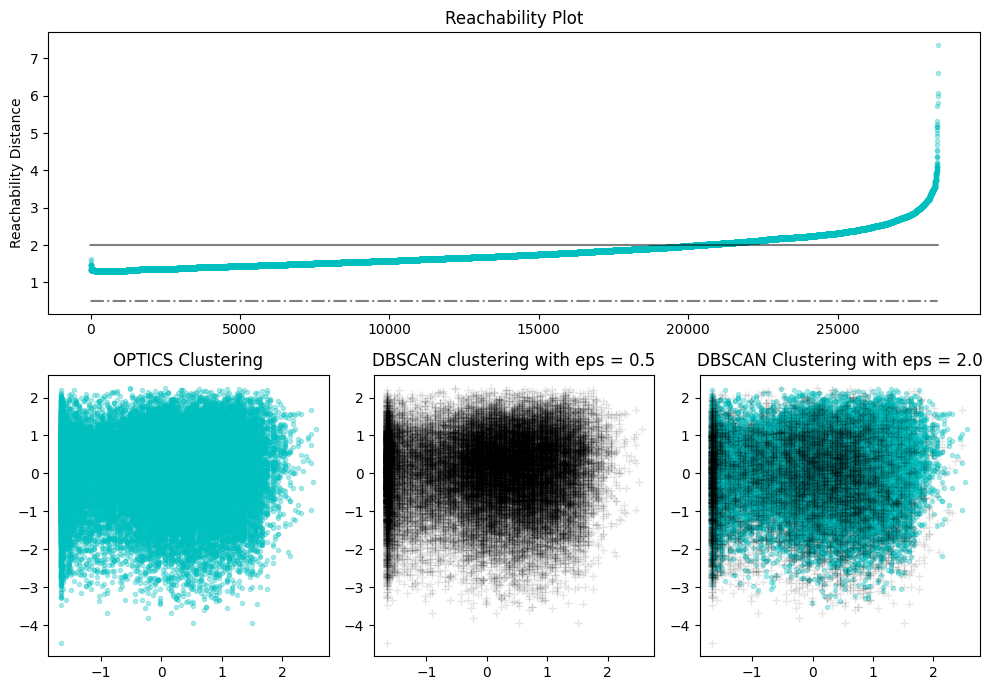

In [9]:
# visualizing the resulting clusters

from matplotlib import gridspec

# Defining the framework of the visualization
plt.figure(figsize =(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Plotting the Reachability-Distance Plot
colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 5), colors):
	Xk = space[labels == Class]
	Rk = reachability[labels == Class]
	ax1.plot(Xk, Rk, colour, alpha = 0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3)
ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5)
ax1.set_ylabel('Reachability Distance')
ax1.set_title('Reachability Plot')

# Assuming scaled_df is a NumPy array and optics.labels_ is a NumPy array
colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 5), colors):
    # Mask for the current class
    class_mask = optics.labels_ == Class
    # Selecting rows for the current class using the mask
    Xk = scaled_df[class_mask]
    # Plotting using the first two columns of the array
    ax2.plot(Xk[:, 0], Xk[:, 1], colour, alpha=0.3)

# Handling noise points
noise_mask = optics.labels_ == -1
# Selecting noise points using the mask
noise_points = scaled_df[noise_mask]
# Plotting noise points
ax2.plot(noise_points[:, 0], noise_points[:, 1], 'k+', alpha=0.1)

ax2.set_title('OPTICS Clustering')

colors = ['c', 'b', 'r', 'y', 'g', 'greenyellow']
for Class, colour in zip(range(0, 6), colors):
    class_mask = labels1 == Class
    Xk = scaled_df[class_mask]
    ax3.plot(Xk[:, 0], Xk[:, 1], colour, alpha=0.3, marker='.')

noise_mask = labels1 == -1
ax3.plot(scaled_df[noise_mask, 0],
         scaled_df[noise_mask, 1],
         'k+', alpha=0.1)
ax3.set_title('DBSCAN clustering with eps = 0.5')

colors = ['c.', 'y.', 'm.', 'g.']
for Class, colour in zip(range(0, 4), colors):
    class_mask = labels2 == Class
    Xk = scaled_df[class_mask]
    ax4.plot(Xk[:, 0], Xk[:, 1], colour, alpha=0.3)

noise_mask = labels2 == -1
ax4.plot(scaled_df[noise_mask, 0],
         scaled_df[noise_mask, 1],
         'k+', alpha=0.1)
ax4.set_title('DBSCAN Clustering with eps = 2.0')

plt.tight_layout()
plt.show()